In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

#Datasets without outlier handling
data_path = r"/content/drive/MyDrive/my Time Series/Final_1h_Feature Engineering_No Missing.csv"
#data_path = r"/content/drive/MyDrive/my Time Series/CFS_based_feature.csv"
#data_path = r"/content/drive/MyDrive/my Time Series/Rank_based_feature.csv"

#Datasets with outlier handling
#data_path = r"/content/drive/MyDrive/my Time Series/Clipped_all_features.csv"
#data_path = r"/content/drive/MyDrive/my Time Series/Clipped_CFS.csv"
#data_path = r"/content/drive/MyDrive/my Time Series/Clipped_Rank.csv"




def load_data(path=data_path):
    df = pd.read_csv(path)
    df = df.drop(columns=['timestamp'])  # remove timestamp
    X = df.drop(columns=['cooling_power'])  # independent variables
    Y = df[['cooling_power']]  # target variable
    return X, Y


df = load_data()

In [ ]:
X, Y = load_data()

def split_data(X, Y, train_fraq):

    """Splits input X and target Y into train, val, and test sets."""
    test_slice = int(len(X) *0.85)
    X_test, Y_test = X[test_slice:], Y[test_slice:]
    X_train_val, Y_train_val = X[:test_slice], Y[:test_slice]

    train_size = int(len(X) * 0.7)

    X_train, Y_train = X_train_val[:train_size], Y_train_val[:train_size]
    X_val, Y_val = X_train_val[train_size:], Y_train_val[train_size:]

    return (X_train, Y_train), (X_val, Y_val), (X_test, Y_test)


train_multi, val_multi, test_multi = split_data(X, Y, train_fraq=0.8)

print("Multivariate Datasets")
print(f"Train Data Shape: {train_multi[0].shape}") # Access the shape of X_train
print(f"Val Data Shape: {val_multi[0].shape}")   # Access the shape of X_val
print(f"Test Data Shape: {test_multi[0].shape}")  # Access the shape of X_test
print(f"Nulls In Train {np.any(np.isnan(train_multi[0]))}") # Access X_train for null check
print(f"Nulls In Validation {np.any(np.isnan(val_multi[0]))}") # Access X_val for null check
print(f"Nulls In Test {np.any(np.isnan(test_multi[0]))}") # Access X_test for null check

Multivariate Datasets
Train Data Shape: (3040, 13)
Val Data Shape: (652, 13)
Test Data Shape: (652, 13)
Nulls In Train False
Nulls In Validation False
Nulls In Test False


In [ ]:
#Checking split sizes

train_multi, val_multi, test_multi = split_data(X, Y, train_fraq=0.8, test_len=108)
train_X, train_Y = train_multi
val_X, val_Y = val_multi
test_X, test_Y = test_multi
print(train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape)

(3040, 13) (3040, 1) (652, 13) (652, 1) (652, 13) (652, 1)


In [ ]:
from math import log2
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


regressor = DecisionTreeRegressor(
    criterion="absolute_error",         # Criterion to measure the quality of a split.
    splitter="best",                    # Strategy to choose the split at each node.
    max_depth= 5,                     # Maximum depth of the tree.
    min_samples_split=2,              # Minimum number of samples required to split an internal node.
    min_samples_leaf=5,                 # Minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0,       # Minimum weighted fraction of the sum of weights required for a leaf node.
    max_features= 3 ,                 ### Number of features to consider for the best split.
    random_state= 15,                 # Controls randomness of the estimator.
    max_leaf_nodes=None,              # Maximum number of leaf nodes.
    min_impurity_decrease=0.0,        # Minimum decrease in impurity required to split.
    ccp_alpha=0.0                     # Complexity parameter for pruning.
)


regressor.fit(train_X, train_Y)
y_val_pred = regressor.predict(val_X)
y_pred = regressor.predict(test_X)


# Evaluate the model
mae_val = mean_absolute_error(val_Y, y_val_pred)
mse_val = mean_squared_error(val_Y, y_val_pred)
rmse_val = np.sqrt(mse_val)
mape_val = mean_absolute_percentage_error(val_Y, y_val_pred)

print("Val Mean Squared Error (MSE):", mse_val)
print("Val Mean Aquared Error (MAE):", mae_val)
print("Val Root Mean Squared Error (RMSE):", rmse_val)
print("Val Mean Absolute Percentage Error (MAPE):", mape_val)



mae = mean_absolute_error(test_Y, y_pred)
mse = mean_squared_error(test_Y, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test_Y, y_pred)
print("##############")
print("Test Mean Squared Error (MSE):", mse)
print("Test Mean Absolute Error (MAE):", mae)
print("Test Root Mean Squared Error (RMSE):", rmse)
print("Test Mean Absolute Percentage Error (MAPE):", mape)


Val Mean Squared Error (MSE): 2.575696725058397
Val Mean Aquared Error (MAE): 1.194925713190184
Val Root Mean Squared Error (RMSE): 1.6048977304047747
Val Mean Absolute Percentage Error (MAPE): 0.09573873958084145
##############
Test Mean Squared Error (MSE): 1.0663852699498848
Test Mean Absolute Error (MAE): 0.7748892714723927
Test Root Mean Squared Error (RMSE): 1.0326593194030085
Test Mean Absolute Percentage Error (MAPE): 0.06427058025368525


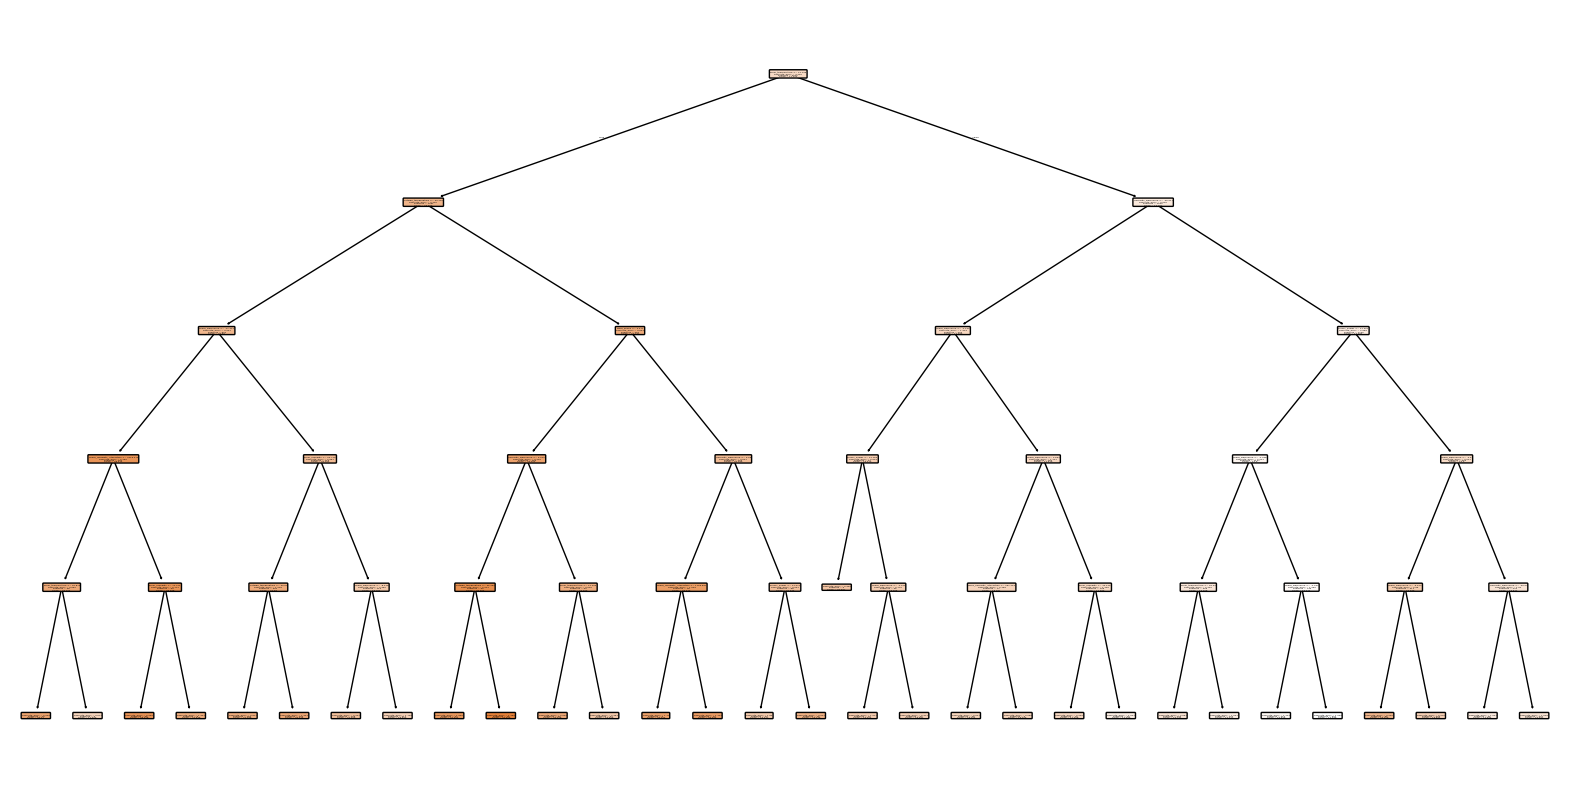

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(regressor, filled=True, feature_names=train_X.columns, rounded=True)
plt.show()


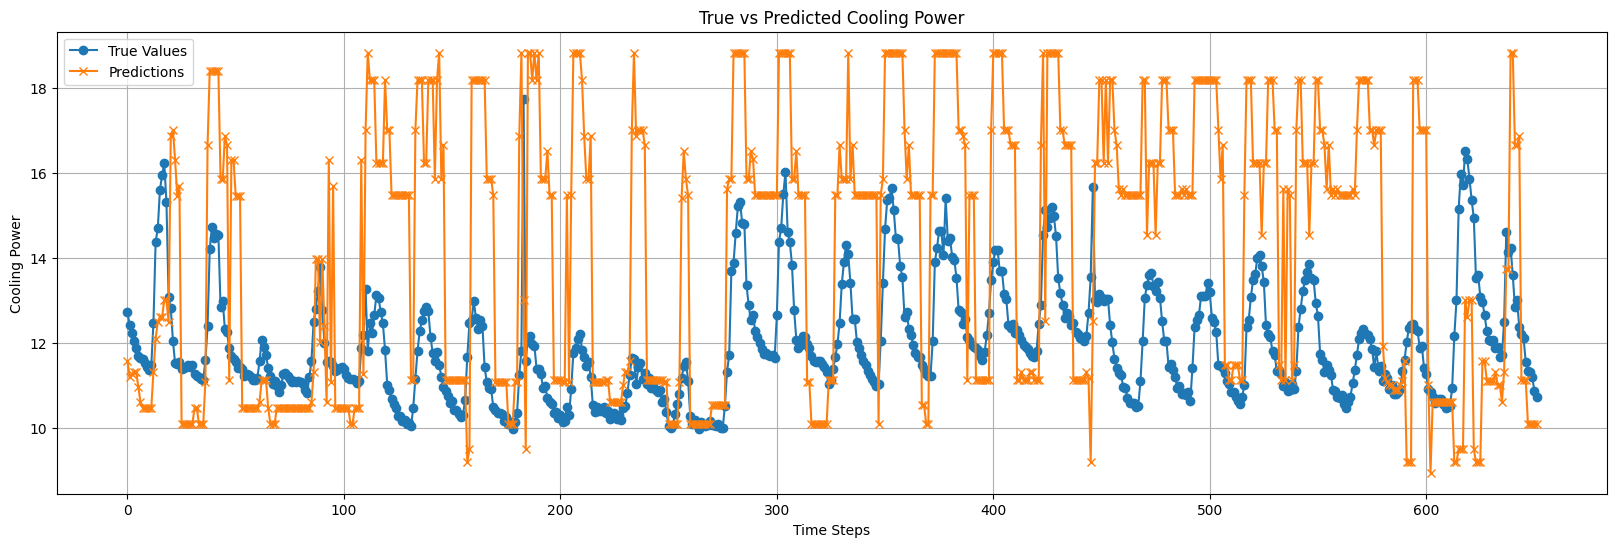

In [ ]:
import matplotlib.pyplot as plt

# 샘플 수 선택 (테스트 데이터 일부만 시각화)
sample_size = len(test_Y)
test_Y_1=test_Y.reset_index()
test_Y_1=test_Y_1.drop(columns=['index'])
#sample_size = 100
plt.figure(figsize=(20, 6))

plt.plot(test_Y_1[:sample_size], label="True Values", marker='o')
plt.plot(y_pred[:sample_size], label="Predictions", marker='x')

plt.title("True vs Predicted Cooling Power")
plt.xlabel("Time Steps")
plt.ylabel("Cooling Power")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import h5py
import joblib # Import joblib for model serialization

# Save the model to an HDF5 file using joblib
# Serialize the model first
serialized_model = joblib.dump(regressor, 'model.joblib')

# Now, open the HDF5 file and save the serialized data
with h5py.File('decision_tree_CFS.h5', 'w') as h5f:
    h5f.create_dataset('model', data=serialized_model) # Use serialized_model as data

from google.colab import files

# Download the file
files.download('decision_tree_CFS.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Getting Best Parameters**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'splitter': ['best', 'random'],
    'max_depth': [5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20],
}

s
from sklearn.metrics import mean_absolute_percentage_error


from sklearn.metrics import make_scorer # Import make_scorer

def mape_score(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

grid_search = GridSearchCV(regressor, param_grid, cv=5, n_jobs=-1, scoring=make_scorer(mape_score, greater_is_better=False))
grid_search.fit(train_X, train_Y)


# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_regressor = grid_search.best_estimator_

# Predict on validation set and test set
y_val_pred = best_regressor.predict(val_X)
y_pred = best_regressor.predict(test_X)

# Evaluate the model
mae_val = mean_absolute_error(val_Y, y_val_pred)
mse_val = mean_squared_error(val_Y, y_val_pred)
rmse_val = np.sqrt(mse_val)
mape_val = mean_absolute_percentage_error(val_Y, y_val_pred)

# Print evaluation metrics
print("Val Mean Squared Error (MSE):", mse_val)
print("Val Mean Absolute Error (MAE):", mae_val)
print("Val Root Mean Squared Error (RMSE):", rmse_val)
print("Val Mean Absolute Percentage Error (MAPE):", mape_val)

# Evaluate on test set

mae = mean_absolute_error(test_Y, y_pred)
mse = mean_squared_error(test_Y, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test_Y, y_pred)
print("##############")
print("Test Mean Squared Error (MSE):", mse)
print("Test Mean Absolute Error (MAE):", mae)
print("Test Root Mean Squared Error (RMSE):", rmse)
print("Test Mean Absolute Percentage Error (MAPE):", mape)


Best Parameters: {'criterion': 'absolute_error', 'max_depth': 14, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
Val Mean Squared Error (MSE): 3.032262849708896
Val Mean Absolute Error (MAE): 1.095011165644172
Val Root Mean Squared Error (RMSE): 1.741339383839031
Val Mean Absolute Percentage Error (MAPE): 0.08505946301770419
##############
Test Mean Squared Error (MSE): 12.964542713265033
Test Mean Absolute Error (MAE): 2.932854202453988
Test Root Mean Squared Error (RMSE): 3.6006308771193183
Test Mean Absolute Percentage Error (MAPE): 0.24158226741548733


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(regressor, param_grid, n_iter=100, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(train_X, train_Y)

# Get the best parameters
best_params_random = random_search.best_params_
print("Best Parameters from Randomized Search:", best_params_random)

# Get the best model
best_regressor_random = random_search.best_estimator_

# Predict on validation set and test set
y_val_pred_random = best_regressor_random.predict(val_X)
y_pred_random = best_regressor_random.predict(test_X)

# Evaluate the model
mae_val_random = mean_absolute_error(val_Y, y_val_pred_random)
mse_val_random = mean_squared_error(val_Y, y_val_pred_random)
rmse_val_random = np.sqrt(mse_val_random)
mape_val_random = mean_absolute_percentage_error(val_Y, y_val_pred_random)

# Print evaluation metrics
print("Val Mean Squared Error (MSE) - Randomized Search:", mse_val_random)
print("Val Mean Absolute Error (MAE) - Randomized Search:", mae_val_random)
print("Val Root Mean Squared Error (RMSE) - Randomized Search:", rmse_val_random)
print("Val Mean Absolute Percentage Error (MAPE) - Randomized Search:", mape_val_random)

# Evaluate on test set
mse_test_random = mean_squared_error(test_Y, y_pred_random)
print("Test Mean Squared Error (MSE) - Randomized Search:", mse_test_random)



#Best Parameters from Randomized Search: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': 8, 'criterion': 'absolute_error'}


Best Parameters from Randomized Search: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': 8, 'criterion': 'absolute_error'}
Val Mean Squared Error (MSE) - Randomized Search: 3.681199742967446
Val Mean Absolute Error (MAE) - Randomized Search: 1.237720176380368
Val Root Mean Squared Error (RMSE) - Randomized Search: 1.918645288469822
Val Mean Absolute Percentage Error (MAPE) - Randomized Search: 0.09736125701396536
Test Mean Squared Error (MSE) - Randomized Search: 14.75886946852588


# **Feature Importance**


Feature Importances:
                     Feature  Importance
4          inner_temperature    0.774274
2        outside_temperature    0.106864
0  Wind_humidity_Interaction    0.060566
1            Temp_Difference    0.058296
3                   rainfall    0.000000


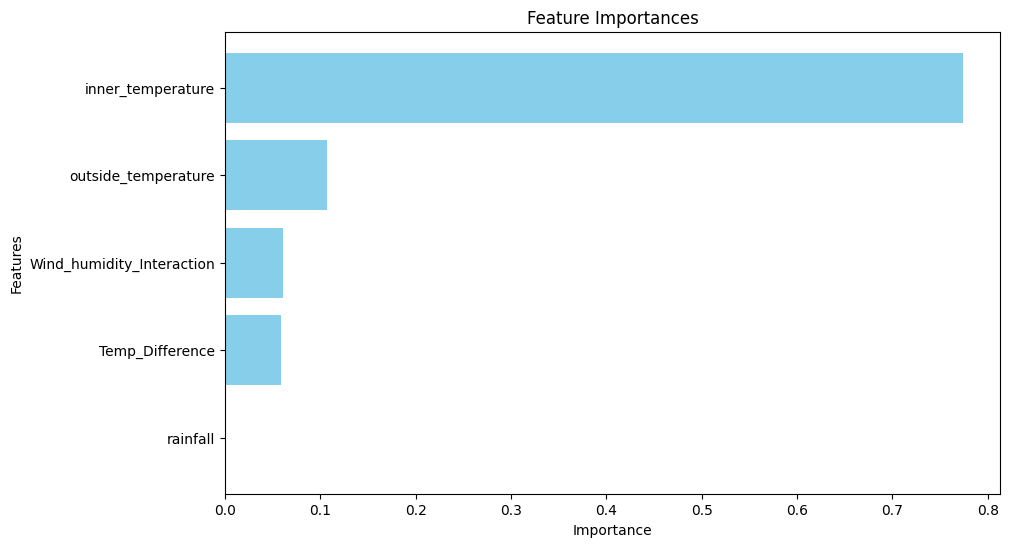

In [ ]:
#Feature importance with the new code
X, Y = load_data()

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Extract feature importances
feature_importances = regressor.feature_importances_
feature_names = X.columns

# Display feature importance in descending order
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

# Plot feature importance (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()